In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
import pickle
%matplotlib inline

In [2]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 2cb96529396d93b46abab7bbc73a208e708c642e
python           : 3.8.10.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.4.0-19041-Microsoft
Version          : #1237-Microsoft Sat Sep 11 14:32:00 PST 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : C.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.2.4
numpy            : 1.18.4
pytz             : 2020.1
dateutil         : 2.7.3
pip              : 20.0.2
setuptools       : 45.2.0
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10.1
IPython          : 7.13.0
pandas_datareader: None
bs4              : None
bottleneck       : None
fsspec     

Update end date below to the previous day's date

In [3]:
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%m/%d/%Y')

'11/16/2021'

In [4]:
x = pd.date_range(start='1/22/2020', end=yesterday)
#x = pd.date_range(start='7/12/2021', end='9/08/2021')

In [5]:
date_list = []
for date_value in x.strftime('%m-%d-%Y'):
    date_list.append(date_value)
dt_date_list = pd.to_datetime(pd.Series(date_list))

In [6]:
df_jhu_us_dict= {}
for y in range(len(date_list)):
    url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + date_list[y] + r'.csv'
    df_jhu_us_dict[date_list[y]] = pd.read_csv(url_value,header=0)
    df_jhu_us_dict[date_list[y]]['dt_date'] = dt_date_list[y]
  #  df_jhu_us_dict[date_list[y]].set_index(['Province_State'],  inplace=True)
    print(date_list[y])

01-22-2020
01-23-2020
01-24-2020
01-25-2020
01-26-2020
01-27-2020
01-28-2020
01-29-2020
01-30-2020
01-31-2020
02-01-2020
02-02-2020
02-03-2020
02-04-2020
02-05-2020
02-06-2020
02-07-2020
02-08-2020
02-09-2020
02-10-2020
02-11-2020
02-12-2020
02-13-2020
02-14-2020
02-15-2020
02-16-2020
02-17-2020
02-18-2020
02-19-2020
02-20-2020
02-21-2020
02-22-2020
02-23-2020
02-24-2020
02-25-2020
02-26-2020
02-27-2020
02-28-2020
02-29-2020
03-01-2020
03-02-2020
03-03-2020
03-04-2020
03-05-2020
03-06-2020
03-07-2020
03-08-2020
03-09-2020
03-10-2020
03-11-2020
03-12-2020
03-13-2020
03-14-2020
03-15-2020
03-16-2020
03-17-2020
03-18-2020
03-19-2020
03-20-2020
03-21-2020
03-22-2020
03-23-2020
03-24-2020
03-25-2020
03-26-2020
03-27-2020
03-28-2020
03-29-2020
03-30-2020
03-31-2020
04-01-2020
04-02-2020
04-03-2020
04-04-2020
04-05-2020
04-06-2020
04-07-2020
04-08-2020
04-09-2020
04-10-2020
04-11-2020
04-12-2020
04-13-2020
04-14-2020
04-15-2020
04-16-2020
04-17-2020
04-18-2020
04-19-2020
04-20-2020
04-21-2020

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
total_key_list = list(df_jhu_us_dict.keys())
part_key_list = total_key_list[345::]

In [10]:
part_key_list[0]

'01-01-2021'

In [11]:
df_Bexar_temp = pd.DataFrame()
for x in part_key_list:
    print(df_jhu_us_dict[x][df_jhu_us_dict[x].Admin2 == 'Bexar'].dt_date.values)
    print(df_jhu_us_dict[x][df_jhu_us_dict[x].Admin2 == 'Bexar'].Confirmed.values)
    print(df_jhu_us_dict[x][df_jhu_us_dict[x].Admin2 == 'Bexar'].Case_Fatality_Ratio.values)
    series_temp = pd.Series((df_jhu_us_dict[x][df_jhu_us_dict[x].Admin2 == 'Bexar'].dt_date.values, df_jhu_us_dict[x][df_jhu_us_dict[x].Admin2 == 'Bexar'].Confirmed.values, df_jhu_us_dict[x][df_jhu_us_dict[x].Admin2 == 'Bexar'].Case_Fatality_Ratio.values), index = ['Date','Confirmed', 'Fatality_Ratio'])
    df_Bexar_temp = df_Bexar_temp.append(series_temp, ignore_index = True)
    print()
  #  temp_list.append((df_jhu_us_dict[x][df_jhu_us_dict[x].Admin2 == 'Bexar'].dt_date, df_jhu_us_dict[x][df_jhu_us_dict[x].Admin2 == 'Bexar'].Confirmed, df_jhu_us_dict[x][df_jhu_us_dict[x].Admin2 == 'Bexar'].Case_Fatality_Ratio))

['2021-01-01T00:00:00.000000000']
[115685]
[1.50321995]

['2021-01-02T00:00:00.000000000']
[119355]
[1.46034938]

['2021-01-03T00:00:00.000000000']
[121591]
[1.43513911]

['2021-01-04T00:00:00.000000000']
[122648]
[1.42440154]

['2021-01-05T00:00:00.000000000']
[124800]
[1.40865385]

['2021-01-06T00:00:00.000000000']
[126897]
[1.40113635]

['2021-01-07T00:00:00.000000000']
[128067]
[1.40473346]

['2021-01-08T00:00:00.000000000']
[129146]
[1.39299707]

['2021-01-09T00:00:00.000000000']
[129146]
[1.42784136]

['2021-01-10T00:00:00.000000000']
[133519]
[1.39231121]

['2021-01-11T00:00:00.000000000']
[135104]
[1.37819754]

['2021-01-12T00:00:00.000000000']
[137407]
[1.37110919]

['2021-01-13T00:00:00.000000000']
[138785]
[1.3776705]

['2021-01-14T00:00:00.000000000']
[140614]
[1.38108581]

['2021-01-15T00:00:00.000000000']
[143503]
[1.38108581]

['2021-01-16T00:00:00.000000000']
[146343]
[1.37211893]

['2021-01-17T00:00:00.000000000']
[148555]
[1.35909259]

['2021-01-18T00:00:00.000000000'

[225547]
[1.59833649]

['2021-06-17T00:00:00.000000000']
[225547]
[1.59966659]

['2021-06-18T00:00:00.000000000']
[225547]
[1.60055332]

['2021-06-19T00:00:00.000000000']
[225547]
[1.60099669]

['2021-06-20T00:00:00.000000000']
[225547]
[1.60188342]

['2021-06-21T00:00:00.000000000']
[225547]
[1.60188342]

['2021-06-22T00:00:00.000000000']
[225547]
[1.60188342]

['2021-06-23T00:00:00.000000000']
[226404]
[1.59626155]

['2021-06-24T00:00:00.000000000']
[226404]
[1.59758662]

['2021-06-25T00:00:00.000000000']
[226404]
[1.60023674]

['2021-06-26T00:00:00.000000000']
[226404]
[1.60023674]

['2021-06-27T00:00:00.000000000']
[226404]
[1.60112012]

['2021-06-28T00:00:00.000000000']
[226404]
[1.60156181]

['2021-06-29T00:00:00.000000000']
[226404]
[1.6020035]

['2021-06-30T00:00:00.000000000']
[227474]
[1.59490755]

['2021-07-01T00:00:00.000000000']
[227474]
[1.59490755]

['2021-07-02T00:00:00.000000000']
[227474]
[1.59534716]

['2021-07-03T00:00:00.000000000']
[227474]
[1.5971056]

['2021-07-

In [12]:
df_Bexar_temp

,Confirmed,Date,Fatality_Ratio
0,[115685],[2021-01-01T00:00:00.000000000],[1.5032199507282706]
1,[119355],[2021-01-02T00:00:00.000000000],[1.460349377906246]
2,[121591],[2021-01-03T00:00:00.000000000],[1.4351391139146812]
3,[122648],[2021-01-04T00:00:00.000000000],[1.4244015393646858]
4,[124800],[2021-01-05T00:00:00.000000000],[1.4086538461538465]
5,[126897],[2021-01-06T00:00:00.000000000],[1.4011363546813558]
6,[128067],[2021-01-07T00:00:00.000000000],[1.4047334598296204]
7,[129146],[2021-01-08T00:00:00.000000000],[1.3929970730800798]
8,[129146],[2021-01-09T00:00:00.000000000],[1.427841357843061]
9,[133519],[2021-01-10T00:00:00.000000000],[1.3923112066447472]


In [13]:
df_Bexar_temp.head()['Confirmed'][0]

array([115685])

In [14]:
df_Bexar_temp['Fatality_Ratio'] = df_Bexar_temp.Fatality_Ratio.astype(float)
df_Bexar_temp['Confirmed'] = df_Bexar_temp.Fatality_Ratio.astype(int)

In [15]:
df_Bexar_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Confirmed       320 non-null    int64  
 1   Date            320 non-null    object 
 2   Fatality_Ratio  320 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.6+ KB


In [16]:
c = df_Bexar_temp

In [17]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Confirmed       320 non-null    int64  
 1   Date            320 non-null    object 
 2   Fatality_Ratio  320 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.6+ KB


In [21]:
d = c['Confirmed']

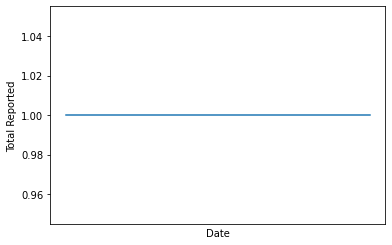

In [22]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Total Reported',color='black')
plt.plot(d)

In [33]:
df_Bexar_temp2 = pd.DataFrame()
for x in part_key_list:
    print(x)
    print(pd.to_datetime(x))
    print(df_jhu_us_dict[x][df_jhu_us_dict[x].Admin2 == 'Bexar'].dt_date.values)
    print(df_jhu_us_dict[x][df_jhu_us_dict[x].Admin2 == 'Bexar'].Confirmed.values)
    print(df_jhu_us_dict[x][df_jhu_us_dict[x].Admin2 == 'Bexar'].Case_Fatality_Ratio.values)
    series_temp = pd.Series((pd.to_datetime(str(x)), df_jhu_us_dict[x][df_jhu_us_dict[x].Admin2 == 'Bexar'].dt_date.values, df_jhu_us_dict[x][df_jhu_us_dict[x].Admin2 == 'Bexar'].Confirmed.values, df_jhu_us_dict[x][df_jhu_us_dict[x].Admin2 == 'Bexar'].Case_Fatality_Ratio.values), index = ['Date_dt','Date','Confirmed', 'Fatality_Ratio'])
    print(series_temp)
    df_Bexar_temp2 = df_Bexar_temp.append(series_temp, ignore_index = True)
    print()

01-01-2021
2021-01-01 00:00:00
['2021-01-01T00:00:00.000000000']
[115685]
[1.50321995]
Date_dt                       2021-01-01 00:00:00
Date              [2021-01-01T00:00:00.000000000]
Confirmed                                [115685]
Fatality_Ratio               [1.5032199507282706]
dtype: object

01-02-2021
2021-01-02 00:00:00
['2021-01-02T00:00:00.000000000']
[119355]
[1.46034938]
Date_dt                       2021-01-02 00:00:00
Date              [2021-01-02T00:00:00.000000000]
Confirmed                                [119355]
Fatality_Ratio                [1.460349377906246]
dtype: object

01-03-2021
2021-01-03 00:00:00
['2021-01-03T00:00:00.000000000']
[121591]
[1.43513911]
Date_dt                       2021-01-03 00:00:00
Date              [2021-01-03T00:00:00.000000000]
Confirmed                                [121591]
Fatality_Ratio               [1.4351391139146812]
dtype: object

01-04-2021
2021-01-04 00:00:00
['2021-01-04T00:00:00.000000000']
[122648]
[1.42440154]
Date_dt

Date_dt                       2021-02-22 00:00:00
Date              [2021-02-22T00:00:00.000000000]
Confirmed                                [193691]
Fatality_Ratio               [1.4264989080545818]
dtype: object

02-23-2021
2021-02-23 00:00:00
['2021-02-23T00:00:00.000000000']
[193961]
[1.43173112]
Date_dt                       2021-02-23 00:00:00
Date              [2021-02-23T00:00:00.000000000]
Confirmed                                [193961]
Fatality_Ratio               [1.4317311212047783]
dtype: object

02-24-2021
2021-02-24 00:00:00
['2021-02-24T00:00:00.000000000']
[194332]
[1.44700821]
Date_dt                       2021-02-24 00:00:00
Date              [2021-02-24T00:00:00.000000000]
Confirmed                                [194332]
Fatality_Ratio               [1.4470082127493156]
dtype: object

02-25-2021
2021-02-25 00:00:00
['2021-02-25T00:00:00.000000000']
[194736]
[1.45941172]
Date_dt                       2021-02-25 00:00:00
Date              [2021-02-25T00:00:00.00000


03-24-2021
2021-03-24 00:00:00
['2021-03-24T00:00:00.000000000']
[202981]
[1.59965711]
Date_dt                       2021-03-24 00:00:00
Date              [2021-03-24T00:00:00.000000000]
Confirmed                                [202981]
Fatality_Ratio               [1.5996571107640616]
dtype: object

03-25-2021
2021-03-25 00:00:00
['2021-03-25T00:00:00.000000000']
[203191]
[1.60735466]
Date_dt                       2021-03-25 00:00:00
Date              [2021-03-25T00:00:00.000000000]
Confirmed                                [203191]
Fatality_Ratio               [1.6073546564562406]
dtype: object

03-26-2021
2021-03-26 00:00:00
['2021-03-26T00:00:00.000000000']
[203370]
[1.61036534]
Date_dt                       2021-03-26 00:00:00
Date              [2021-03-26T00:00:00.000000000]
Confirmed                                [203370]
Fatality_Ratio               [1.6103653439543688]
dtype: object

03-27-2021
2021-03-27 00:00:00
['2021-03-27T00:00:00.000000000']
[203523]
[1.61554222]
Date_d

[214382]
[1.60321296]
Date_dt                       2021-04-21 00:00:00
Date              [2021-04-21T00:00:00.000000000]
Confirmed                                [214382]
Fatality_Ratio               [1.6032129563116306]
dtype: object

04-22-2021
2021-04-22 00:00:00
['2021-04-22T00:00:00.000000000']
[214631]
[1.60321668]
Date_dt                       2021-04-22 00:00:00
Date              [2021-04-22T00:00:00.000000000]
Confirmed                                [214631]
Fatality_Ratio               [1.6032166835172923]
dtype: object

04-23-2021
2021-04-23 00:00:00
['2021-04-23T00:00:00.000000000']
[214699]
[1.60503775]
Date_dt                       2021-04-23 00:00:00
Date              [2021-04-23T00:00:00.000000000]
Confirmed                                [214699]
Fatality_Ratio                [1.605037750525154]
dtype: object

04-24-2021
2021-04-24 00:00:00
['2021-04-24T00:00:00.000000000']
[214699]
[1.60690082]
Date_dt                       2021-04-24 00:00:00
Date              [202


05-21-2021
2021-05-21 00:00:00
['2021-05-21T00:00:00.000000000']
[221664]
[1.60152303]
Date_dt                       2021-05-21 00:00:00
Date              [2021-05-21T00:00:00.000000000]
Confirmed                                [221664]
Fatality_Ratio               [1.6015230258409123]
dtype: object

05-22-2021
2021-05-22 00:00:00
['2021-05-22T00:00:00.000000000']
[221664]
[1.60332756]
Date_dt                       2021-05-22 00:00:00
Date              [2021-05-22T00:00:00.000000000]
Confirmed                                [221664]
Fatality_Ratio               [1.6033275588277751]
dtype: object

05-23-2021
2021-05-23 00:00:00
['2021-05-23T00:00:00.000000000']
[221664]
[1.60377869]
Date_dt                       2021-05-23 00:00:00
Date              [2021-05-23T00:00:00.000000000]
Confirmed                                [221664]
Fatality_Ratio               [1.6037786920744912]
dtype: object

05-24-2021
2021-05-24 00:00:00
['2021-05-24T00:00:00.000000000']
[222429]
[1.59826282]
Date_d

[1.60099669]
Date_dt                       2021-06-19 00:00:00
Date              [2021-06-19T00:00:00.000000000]
Confirmed                                [225547]
Fatality_Ratio               [1.6009966880517144]
dtype: object

06-20-2021
2021-06-20 00:00:00
['2021-06-20T00:00:00.000000000']
[225547]
[1.60188342]
Date_dt                       2021-06-20 00:00:00
Date              [2021-06-20T00:00:00.000000000]
Confirmed                                [225547]
Fatality_Ratio               [1.6018834211938089]
dtype: object

06-21-2021
2021-06-21 00:00:00
['2021-06-21T00:00:00.000000000']
[225547]
[1.60188342]
Date_dt                       2021-06-21 00:00:00
Date              [2021-06-21T00:00:00.000000000]
Confirmed                                [225547]
Fatality_Ratio               [1.6018834211938089]
dtype: object

06-22-2021
2021-06-22 00:00:00
['2021-06-22T00:00:00.000000000']
[225547]
[1.60188342]
Date_dt                       2021-06-22 00:00:00
Date              [2021-06-22T0

2021-07-18 00:00:00
['2021-07-18T00:00:00.000000000']
[230623]
[1.58440398]
Date_dt                       2021-07-18 00:00:00
Date              [2021-07-18T00:00:00.000000000]
Confirmed                                [230623]
Fatality_Ratio                [1.584403983991189]
dtype: object

07-19-2021
2021-07-19 00:00:00
['2021-07-19T00:00:00.000000000']
[230623]
[1.58440398]
Date_dt                       2021-07-19 00:00:00
Date              [2021-07-19T00:00:00.000000000]
Confirmed                                [230623]
Fatality_Ratio                [1.584403983991189]
dtype: object

07-20-2021
2021-07-20 00:00:00
['2021-07-20T00:00:00.000000000']
[230623]
[1.58483759]
Date_dt                       2021-07-20 00:00:00
Date              [2021-07-20T00:00:00.000000000]
Confirmed                                [230623]
Fatality_Ratio               [1.5848375920875195]
dtype: object

07-21-2021
2021-07-21 00:00:00
['2021-07-21T00:00:00.000000000']
[233167]
[1.56883264]
Date_dt           

08-18-2021
2021-08-18 00:00:00
['2021-08-18T00:00:00.000000000']
[267630]
[1.41837612]
Date_dt                       2021-08-18 00:00:00
Date              [2021-08-18T00:00:00.000000000]
Confirmed                                [267630]
Fatality_Ratio               [1.4183761162799386]
dtype: object

08-19-2021
2021-08-19 00:00:00
['2021-08-19T00:00:00.000000000']
[268970]
[1.41800201]
Date_dt                       2021-08-19 00:00:00
Date              [2021-08-19T00:00:00.000000000]
Confirmed                                [268970]
Fatality_Ratio               [1.4180020076588469]
dtype: object

08-20-2021
2021-08-20 00:00:00
['2021-08-20T00:00:00.000000000']
[270211]
[1.41889116]
Date_dt                       2021-08-20 00:00:00
Date              [2021-08-20T00:00:00.000000000]
Confirmed                                [270211]
Fatality_Ratio               [1.4188911628320091]
dtype: object

08-21-2021
2021-08-21 00:00:00
['2021-08-21T00:00:00.000000000']
[270211]
[1.42814319]
Date_dt

09-18-2021
2021-09-18 00:00:00
['2021-09-18T00:00:00.000000000']
[302964]
[1.47905362]
Date_dt                       2021-09-18 00:00:00
Date              [2021-09-18T00:00:00.000000000]
Confirmed                                [302964]
Fatality_Ratio               [1.4790536169313846]
dtype: object

09-19-2021
2021-09-19 00:00:00
['2021-09-19T00:00:00.000000000']
[302964]
[1.48103405]
Date_dt                       2021-09-19 00:00:00
Date              [2021-09-19T00:00:00.000000000]
Confirmed                                [302964]
Fatality_Ratio               [1.4810340502501946]
dtype: object

09-20-2021
2021-09-20 00:00:00
['2021-09-20T00:00:00.000000000']
[304934]
[1.4717939]
Date_dt                       2021-09-20 00:00:00
Date              [2021-09-20T00:00:00.000000000]
Confirmed                                [304934]
Fatality_Ratio               [1.4717938963841355]
dtype: object

09-21-2021
2021-09-21 00:00:00
['2021-09-21T00:00:00.000000000']
[305278]
[1.4802901]
Date_dt  

10-16-2021
2021-10-16 00:00:00
['2021-10-16T00:00:00.000000000']
[317209]
[1.56960507]
Date_dt                       2021-10-16 00:00:00
Date              [2021-10-16T00:00:00.000000000]
Confirmed                                [317209]
Fatality_Ratio               [1.5696050742359458]
dtype: object

10-17-2021
2021-10-17 00:00:00
['2021-10-17T00:00:00.000000000']
[317916]
[1.57181401]
Date_dt                       2021-10-17 00:00:00
Date              [2021-10-17T00:00:00.000000000]
Confirmed                                [317916]
Fatality_Ratio                 [1.57181400779438]
dtype: object

10-18-2021
2021-10-18 00:00:00
['2021-10-18T00:00:00.000000000']
[318126]
[1.56416011]
Date_dt                       2021-10-18 00:00:00
Date              [2021-10-18T00:00:00.000000000]
Confirmed                                [318126]
Fatality_Ratio               [1.5641601126597635]
dtype: object

10-19-2021
2021-10-19 00:00:00
['2021-10-19T00:00:00.000000000']
[318387]
[1.56664688]
Date_dt

In [34]:
df_Bexar_temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Confirmed       321 non-null    object        
 1   Date            321 non-null    object        
 2   Fatality_Ratio  321 non-null    object        
 3   Date_dt         1 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 10.2+ KB


In [36]:
df_Bexar_temp2

,Confirmed,Date,Fatality_Ratio,Date_dt
0,1,[2021-01-01T00:00:00.000000000],1.50322,NaT
1,1,[2021-01-02T00:00:00.000000000],1.460349,NaT
2,1,[2021-01-03T00:00:00.000000000],1.435139,NaT
3,1,[2021-01-04T00:00:00.000000000],1.424402,NaT
4,1,[2021-01-05T00:00:00.000000000],1.408654,NaT
5,1,[2021-01-06T00:00:00.000000000],1.401136,NaT
6,1,[2021-01-07T00:00:00.000000000],1.404733,NaT
7,1,[2021-01-08T00:00:00.000000000],1.392997,NaT
8,1,[2021-01-09T00:00:00.000000000],1.427841,NaT
9,1,[2021-01-10T00:00:00.000000000],1.392311,NaT
